# Classification Based Machine Learning Algorithm

[An introduction to machine learning with scikit-learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction)

## Scikit-learn Definition:

**Supervised learning**, in which the data comes with additional attributes that we want to predict. This problem can be either:

* **Classification**: samples belong to two or more *classes* and we want to learn from already labeled data how to predict the class of unlabeled data. An example of classification problem would be the handwritten digit recognition example, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.


* **Regression**: if the desired output consists of one or more *continuous variables*, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

MNIST dataset - a set of 70,000 small images of digits handwritten. You can read more via [The MNIST Database](http://yann.lecun.com/exdb/mnist/)

***

## Downloading the MNIST dataset

In [2]:
import numpy as np

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [4]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [5]:
len(mnist['data'])

70000

# Visualisation

In [6]:
X, y = mnist['data'], mnist['target']

In [7]:
x = X.to_numpy()
x[10]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,  42., 118., 219., 166., 118., 118.,   6.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 10

In [8]:
y[10]

'3'

In [9]:
y[69999]

'6'

In [10]:
X.shape

(70000, 784)

In [11]:
y.shape

(70000,)

In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

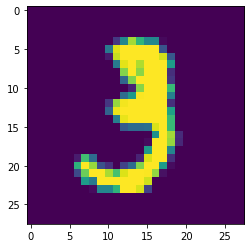

In [13]:
_ = x[10]
_image = _.reshape(28, 28)
plt.imshow(_image);

In [14]:
y[1000]

'0'

### Exercise: Locating the number 4 and plot the image

In [15]:
type(y)

pandas.core.series.Series

In [16]:
y_target = y.to_numpy()

In [17]:
y_target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [18]:
y_target == 7

array([False, False, False, ..., False, False, False])

In [19]:
np.where(y_target==7)

(array([], dtype=int64),)

In [20]:
y[24754]

'6'

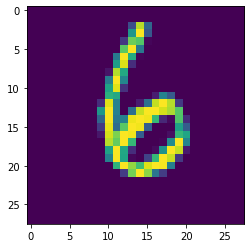

In [21]:
_ = x[24754]
_image = _.reshape(28, 28)
plt.imshow(_image);

# Splitting the train and test sets

In [22]:
num_split = 10000

X_train, X_test, y_train, y_test = x[:num_split], x[num_split:], y[:num_split], y[num_split:]

**Tips**: Typically we shuffle the training set. This ensures the training set is randomised and your data distribution is consistent. However, shuffling is a bad idea for time series data.

# Shuffling the dataset

[Alternative Method](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)

In [23]:
import numpy as np

In [24]:
shuffle_index = np.random.permutation(num_split)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [25]:
X_train.shape

(10000, 784)

In [26]:
y_train.shape

(10000,)

## Training a Binary Classifier

To simplify our problem, we will make this an exercise of "zero" or "non-zero", making it a two-class problem.

We need to first convert our target to 0 or non zero.

In [27]:
y_train_0 = (y_train == 0)

In [28]:
y_train_0

6206    False
7017    False
9632    False
6493    False
6971    False
        ...  
655     False
7085    False
2754    False
8701    False
9610    False
Name: class, Length: 10000, dtype: bool

In [29]:
y_test_0 = (y_test == 0)

In [30]:
y_test_0

10000    False
10001    False
10002    False
10003    False
10004    False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Name: class, Length: 60000, dtype: bool

At this point we can pick any classifier and train it. This is the iterative part of choosing and testing all the classifiers and tuning the hyper parameters

***

# SGDClassifier

# Training

In [32]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

# Prediction

In [33]:
clf.predict(x[1].reshape(1, -1))

array(['0'], dtype='<U1')

***

# Performance Measures

# Measuring Accuracy Using Cross-Validation

## StratifiedKFold

Let's try with the `StratifiedKFold` stratified sampling to create multiple folds. At each iteration, the classifier was cloned and trained using the training folds and makes predictions on the test fold. 

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
clf = SGDClassifier(random_state=0)

In [ ]:
skfolds = StratifiedKFold(n_splits=3, random_state=100)

In [ ]:
for train_index, test_index in skfolds.split(X_train, y_train_0):
    clone_clf = clone(clf)
    X_train_fold = X_train[train_index]
    y_train_folds = (y_train_0[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_0[test_index])
    
    clone_clf.fit(X_train_fold, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("{0:.4f}".format(n_correct / len(y_pred)))

#### `cross_val_score` using K-fold Cross-Validation

K-fold cross-validation splits the training set into K-folds and then make predictions and evaluate them on each fold using a model trained on the remaning folds.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(clf, X_train, y_train_0, cv=3, scoring='accuracy')

## Danger of Blindly Applying Evaluator As a Performance Measure

Let's check against a dumb classifier

In [ ]:
1 - sum(y_train_0) / len(y_train_0)

A simple check shows that 90.1% of the images are not zero. Any time you guess the image is not zero, you will be right 90.13% of the time. 

Bare this in mind when you are dealing with **skewed datasets**. Because of this, accuracy is generally not the preferred performance measure for classifiers.

# Confusion Matrix

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
y_train_pred = cross_val_predict(clf, X_train, y_train_0, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train_0, y_train_pred)

Each row: actual class

Each column: predicted class

First row: Non-zero images, the negative class:
* 53360 were correctly classified as non-zeros. **True negatives**. 
* Remaining 717 were wrongly classified as 0s. **False positive**


Second row: The images of zeros, the positive class:
* 395 were incorrectly classified as 0s. **False negatives**
* 5528 were correctly classified as 0s. **True positives**


<img src="img\confusion matrix.jpg">

# Precision

**Precision** measures the accuracy of positive predictions. Also called the `precision` of the classifier

$$\textrm{precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$

<img src="img\precision.jpg">

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train_0, y_train_pred) # 5528 / (717 + 5528)

In [ ]:
5528 / (717+5528)

## Recall

`Precision` is typically used with `recall` (`Sensitivity` or `True Positive Rate`). The ratio of positive instances that are correctly detected by the classifier.

$$\textrm{recall} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Negatives}}$$

<img src="img\recall.jpg">

In [ ]:
recall_score(y_train_0, y_train_pred) # 5528 / (395 + 5528)

In [ ]:
5528 / (395 + 5528)

## F1 Score

$F_1$ score is the harmonic mean of precision and recall. Regular mean gives equal weight to all values. Harmonic mean gives more weight to low values.


$$F_1=\frac{2}{\frac{1}{\textrm{precision}}+\frac{1}{\textrm{recall}}}=2\times \frac{\textrm{precision}\times \textrm{recall}}{\textrm{precision}+ \textrm{recall}}=\frac{TP}{TP+\frac{FN+FP}{2}}$$

The $F_1$ score favours classifiers that have similar precision and recall.


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_train_0, y_train_pred)

# Precision / Recall Tradeoff

Increasing precision reduced recall and vice versa

<img src="img\precision-recall.png">

Our classifier is designed to pick up zeros.

12 observations

***

**Central Arrow**

Suppose the decision threshold is positioned at the central arrow: 
* We get 4 true positives (We have 4 zeros to the right of the central arrow)
* 1 false positive which is actually seven.

At this threshold, the **precision accuracy** is $\frac{4}{5}=80\%$

However, out of the 6 zeros, the classifier only picked up 4. The **recall accuracy** is $\frac{4}{6}=67\%$

***

**Right Arrow**

* We get 3 true positives
* 0 false positive

At this threshold, the **precision accuracy** is $\frac{3}{3}=100\%$
However, out of the 6 zeros, the classifier only picked up 3. The **recall accuracy** is $\frac{3}{6}=50\%$

***

**Left Arrow**

* We get 6 true positives
* 2 false positive

At this threshold, the **precision accuracy** is $\frac{6}{8}=75\%$
Out of the 6 zeros, the classifier picked up all 6. The **recall accuracy** is $\frac{6}{6}=100\%$

***




In [ ]:
clf = SGDClassifier(random_state=0)
clf.fit(X_train, y_train_0)

In [ ]:
y[1000]

In [ ]:
y_scores = clf.decision_function(X[1000].reshape(1, -1))
y_scores

In [ ]:
threshold = 0

In [ ]:
y_some_digits_pred = (y_scores > threshold)

In [ ]:
y_some_digits_pred

In [ ]:
threshold = 40000
y_some_digits_pred = (y_scores > threshold)
y_some_digits_pred

In [ ]:
y_scores = cross_val_predict(clf, X_train, y_train_0, cv=3, method='decision_function')

In [ ]:
plt.figure(figsize=(12,8)); plt.hist(y_scores, bins=100);

With the decision scores, we can compute precision and recall for all possible thresholds using the `precision_recall_curve()` function:

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([-0.5,1.5])    

In [ ]:
plt.figure(figsize=(12,8)); 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

With this chart, you can select the threshold value that gives you the best precision/recall tradeoff for your task.

Some tasks may call for higher precision (accuracy of positive predictions). Like designing a classifier that picks up adult contents to protect kids. This will require the classifier to set a high bar to allow any contents to be consumed by children.

Some tasks may call for higher recall (ratio of positive instances that are correctly detected by the classifier). Such as detecting shoplifters/intruders on surveillance images - Anything that remotely resemble "positive" instances to be picked up.

***

One can also plot precisions against recalls to assist with the threshold selection

In [ ]:
plt.figure(figsize=(12,8)); 
plt.plot(precisions, recalls);
plt.xlabel('recalls');
plt.ylabel('precisions');
plt.title('PR Curve: precisions/recalls tradeoff');

# Setting High Precisions

Let's aim for 90% precisions.

In [ ]:
len(precisions)

In [ ]:
len(thresholds)

In [ ]:
plt.figure(figsize=(12,8)); 
plt.plot(thresholds, precisions[1:]);

In [ ]:
idx = len(precisions[precisions < 0.9])

In [ ]:
thresholds[idx]

In [ ]:
y_train_pred_90 = (y_scores > 21454)

In [ ]:
precision_score(y_train_0, y_train_pred_90)

In [ ]:
recall_score(y_train_0, y_train_pred_90)

# Setting High Precisions

Let's aim for 99% precisions.

In [ ]:
idx = len(precisions[precisions < 0.99])

In [ ]:
thresholds[idx]

In [ ]:
y_train_pred_90 = (y_scores > thresholds[idx])

In [ ]:
precision_score(y_train_0, y_train_pred_90)

In [ ]:
recall_score(y_train_0, y_train_pred_90)

***

## The Receiver Operating Characteristics (ROC) Curve

Instead of plotting precision versus recall, the ROC curve plots the `true positive rate` (another name for recall) against the `false positive rate`. The `false positive rate` (FPR) is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the `true negative rate`, which is the ratio of negative instances that are correctly classified as negative.

The TNR is also called `specificity`. Hence the ROC curve plots `sensitivity` (recall) versus `1 - specificity`.

<img src="img\tnr_and_fpr.png">

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

In [ ]:
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_train_0, y_scores)

Use PR curve whenever the **positive class is rare** or when you care more about the false positives than the false negatives

Use ROC curve whenever the **negative class is rare** or when you care more about the false negatives than the false positives


In the example above, the ROC curve seemed to suggest that the classifier is good. However, when you look at the PR curve, you can see that there are room for improvement.

# Model Comparison

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
f_clf = RandomForestClassifier(random_state=0)

In [ ]:
y_probas_forest = cross_val_predict(f_clf, X_train, y_train_0,
                                   cv=3, method='predict_proba')

In [ ]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_0, y_scores_forest)

In [ ]:
plt.figure(figsize=(12,8)); 
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show();

In [ ]:
roc_auc_score(y_train_0, y_scores_forest)

In [ ]:
f_clf.fit(X_train, y_train_0)

In [ ]:
y_train_rf = cross_val_predict(f_clf, X_train, y_train_0, cv=3)

In [ ]:
precision_score(y_train_0, y_train_rf) 

In [ ]:
recall_score(y_train_0, y_train_rf) 

In [ ]:
confusion_matrix(y_train_0, y_train_rf)

***